In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np  
from sklearn.preprocessing import OneHotEncoder
import json

# Load Data

In [3]:
df_info = pd.read_csv('Data/superhero_info - superhero_info.csv')
df_power = pd.read_csv('Data/superhero_powers - superhero_powers.csv')

## Superhero Info DataFrame

In [4]:
df_info.head()

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}"
2,Abin Sur|DC Comics,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}"
3,Abomination|Marvel Comics,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
4,Absorbing Man|Marvel Comics,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}"


In [5]:
df_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Hero|Publisher  463 non-null    object
 1   Gender          463 non-null    object
 2   Race            463 non-null    object
 3   Alignment       463 non-null    object
 4   Hair color      463 non-null    object
 5   Eye color       463 non-null    object
 6   Skin color      463 non-null    object
 7   Measurements    463 non-null    object
dtypes: object(8)
memory usage: 29.1+ KB


In [6]:
df_info.duplicated().sum()

0

In [7]:
# Split Column Hero|Publisher

df_info['Hero|Publisher'].str.split('|', expand=True)

,0,1
0,A-Bomb,Marvel Comics
1,Abe Sapien,Dark Horse Comics
2,Abin Sur,DC Comics
3,Abomination,Marvel Comics
4,Absorbing Man,Marvel Comics
...,...,...
458,Yellowjacket,Marvel Comics
459,Yellowjacket II,Marvel Comics
460,Yoda,George Lucas
461,Zatanna,DC Comics


In [8]:
df_info[['Hero', 'Publisher']] = df_info['Hero|Publisher'].str.split('|', expand=True)
df_info.head()

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics
2,Abin Sur|DC Comics,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}",Abin Sur,DC Comics
3,Abomination|Marvel Comics,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",Abomination,Marvel Comics
4,Absorbing Man|Marvel Comics,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}",Absorbing Man,Marvel Comics


In [9]:
df_info = df_info.drop(columns='Hero|Publisher')

In [10]:
# Dropped Hero | Publisher column

df_info.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics
2,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}",Abin Sur,DC Comics
3,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",Abomination,Marvel Comics
4,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}",Absorbing Man,Marvel Comics


In [11]:
df_info['Measurements'].str.split(',', expand=True)

,0,1
0,{'Height': '203.0 cm','Weight': '441.0 kg'}
1,{'Height': '191.0 cm','Weight': '65.0 kg'}
2,{'Height': '185.0 cm','Weight': '90.0 kg'}
3,{'Height': '203.0 cm','Weight': '441.0 kg'}
4,{'Height': '193.0 cm','Weight': '122.0 kg'}
...,...,...
458,{'Height': '183.0 cm','Weight': '83.0 kg'}
459,{'Height': '165.0 cm','Weight': '52.0 kg'}
460,{'Height': '66.0 cm','Weight': '17.0 kg'}
461,{'Height': '170.0 cm','Weight': '57.0 kg'}


In [12]:
df_info[['Height (cm)', 'Weight (kg)']] = df_info['Measurements'].str.split(',', expand=True)
df_info.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher,Height (cm),Weight (kg)
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics,{'Height': '203.0 cm','Weight': '441.0 kg'}
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics,{'Height': '191.0 cm','Weight': '65.0 kg'}
2,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}",Abin Sur,DC Comics,{'Height': '185.0 cm','Weight': '90.0 kg'}
3,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",Abomination,Marvel Comics,{'Height': '203.0 cm','Weight': '441.0 kg'}
4,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}",Absorbing Man,Marvel Comics,{'Height': '193.0 cm','Weight': '122.0 kg'}


In [13]:
# Dropped Measurements column after separation

df_info = df_info.drop(columns='Measurements')

In [14]:
df_info['Height (cm)'] = df_info['Height (cm)'].str.extract('(\d+)')

# Reference: https://pandas.pydata.org/pandas-docs/version/0.24.0rc1/api/generated/pandas.Series.str.extract.html

In [15]:
df_info['Weight (kg)'] = df_info['Weight (kg)'].str.extract('(\d+)')

# Reference: https://pandas.pydata.org/pandas-docs/version/0.24.0rc1/api/generated/pandas.Series.str.extract.html

In [16]:
df_info.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height (cm),Weight (kg)
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203,441
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191,65
2,Male,Ungaran,good,No Hair,blue,red,Abin Sur,DC Comics,185,90
3,Male,Human / Radiation,bad,No Hair,green,Unknown,Abomination,Marvel Comics,203,441
4,Male,Human,bad,No Hair,blue,Unknown,Absorbing Man,Marvel Comics,193,122


In [17]:
df_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Gender       463 non-null    object
 1   Race         463 non-null    object
 2   Alignment    463 non-null    object
 3   Hair color   463 non-null    object
 4   Eye color    463 non-null    object
 5   Skin color   463 non-null    object
 6   Hero         463 non-null    object
 7   Publisher    463 non-null    object
 8   Height (cm)  463 non-null    object
 9   Weight (kg)  463 non-null    object
dtypes: object(10)
memory usage: 36.3+ KB


## Superhero Powers DataFrame

In [18]:
df_power.head()

,hero_names,Powers
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super..."
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du..."
3,Abin Sur,Lantern Power Ring
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt..."


In [19]:
df_power.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hero_names  667 non-null    object
 1   Powers      667 non-null    object
dtypes: object(2)
memory usage: 10.5+ KB


In [20]:
df_power.duplicated().sum()

0

In [21]:
df_power['Hero'] = df_power['hero_names']

In [22]:
df_power.head()

,hero_names,Powers,Hero
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",3-D Man
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...",A-Bomb
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du...",Abe Sapien
3,Abin Sur,Lantern Power Ring,Abin Sur
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt...",Abomination


In [23]:
df_power = df_power.drop(columns='hero_names')

In [24]:
#df_power['Powers'] = df_power['Powers'].str.split(',')

In [25]:
# Exploded columns
# Get a list of all options using df_power.explode

exploded = df_power.explode('Powers')
exploded[['Powers','Hero']].head()

,Powers,Hero
0,"Agility,Super Strength,Stamina,Super Speed",3-D Man
1,"Accelerated Healing,Durability,Longevity,Super...",A-Bomb
2,"Agility,Accelerated Healing,Cold Resistance,Du...",Abe Sapien
3,Lantern Power Ring,Abin Sur
4,"Accelerated Healing,Intelligence,Super Strengt...",Abomination


In [26]:
# we do not want to save NaN to our list so we can use .dropna() right before our .unique()

cols_to_make = exploded['Powers'].dropna().unique()
cols_to_make

array(['Agility,Super Strength,Stamina,Super Speed',
       'Accelerated Healing,Durability,Longevity,Super Strength,Stamina,Camouflage,Self-Sustenance',
       'Agility,Accelerated Healing,Cold Resistance,Durability,Underwater breathing,Marksmanship,Weapons Master,Longevity,Intelligence,Super Strength,Telepathy,Stamina,Immortality,Reflexes,Enhanced Sight,Sub-Mariner',
       'Lantern Power Ring',
       'Accelerated Healing,Intelligence,Super Strength,Stamina,Super Speed,Invulnerability,Animation,Super Breath',
       'Dimensional Awareness,Flight,Intelligence,Super Strength,Size Changing,Super Speed,Teleportation,Magic,Dimensional Travel,Immortality,Invulnerability,Molecular Manipulation,Energy Manipulation,Power Cosmic',
       'Cold Resistance,Durability,Energy Absorption,Super Strength,Invulnerability,Elemental Transmogrification,Fire Resistance,Natural Armor,Molecular Manipulation,Heat Resistance,Matter Absorption',
       'Accelerated Healing,Immortality,Regeneration',
       'D

In [27]:
for col in cols_to_make:
    df_power[col] = df_power['Powers'].str.contains(col)
df_power.head(10)

C:\Users\JEANCA~1\AppData\Local\Temp/ipykernel_7020/1167021358.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_power[col] = df_power['Powers'].str.contains(col)


,Powers,Hero,"Agility,Super Strength,Stamina,Super Speed","Accelerated Healing,Durability,Longevity,Super Strength,Stamina,Camouflage,Self-Sustenance","Agility,Accelerated Healing,Cold Resistance,Durability,Underwater breathing,Marksmanship,Weapons Master,Longevity,Intelligence,Super Strength,Telepathy,Stamina,Immortality,Reflexes,Enhanced Sight,Sub-Mariner",Lantern Power Ring,"Accelerated Healing,Intelligence,Super Strength,Stamina,Super Speed,Invulnerability,Animation,Super Breath","Dimensional Awareness,Flight,Intelligence,Super Strength,Size Changing,Super Speed,Teleportation,Magic,Dimensional Travel,Immortality,Invulnerability,Molecular Manipulation,Energy Manipulation,Power Cosmic","Cold Resistance,Durability,Energy Absorption,Super Strength,Invulnerability,Elemental Transmogrification,Fire Resistance,Natural Armor,Molecular Manipulation,Heat Resistance,Matter Absorption","Accelerated Healing,Immortality,Regeneration",...,"Durability,Flight,Longevity,Super Strength,Energy Blasts,Size Changing,Stamina,Super Speed,Reflexes,Invulnerability,Self-Sustenance","Accelerated Healing,Durability,Flight,Marksmanship,Weapons Master,Longevity,Intelligence,Super Strength,Telepathy,Stamina,Super Speed,Animal Oriented Powers,Weapon-based Powers,Enhanced Senses,Dimensional Travel,Enhanced Memory,Reflexes,Force Fields,Fire Resistance,Enhanced Hearing,Hypnokinesis,Enhanced Smell,Vision - Telescopic,Toxin and Disease Resistance,Magic Resistance,Vision - Microscopic,Vision - Night,Vision - Infrared,Vision - X-Ray,Vision - Thermal","Agility,Accelerated Healing,Durability,Stealth,Marksmanship,Longevity,Super Strength,Stamina,Jump,Reflexes,Enhanced Hearing,Enhanced Sight,Natural Weapons,Enhanced Smell,Vision - Telescopic,Toxin and Disease Resistance,Vision - Night","Flight,Telepathy,Astral Travel,Teleportation,Telekinesis,Phasing,Astral Projection,Psionic Powers,Mind Control,Intangibility,Illusions","Size Changing,Animal Oriented Powers","Flight,Energy Blasts,Size Changing","Cold Resistance,Durability,Longevity,Super Strength,Cryokinesis,Immortality","Agility,Stealth,Danger Sense,Marksmanship,Weapons Master,Longevity,Intelligence,Telepathy,Energy Blasts,Stamina,Super Speed,Telekinesis,Jump,Reflexes,Force Fields,Empathy,Precognition,Cloaking,The Force","Cryokinesis,Telepathy,Magic,Fire Control,Probability Manipulation,Water Control,Terrakinesis,Weather Control","Super Speed,Intangibility,Time Travel,Time Manipulation"
0,"Agility,Super Strength,Stamina,Super Speed",3-D Man,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,"Accelerated Healing,Durability,Longevity,Super...",A-Bomb,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,"Agility,Accelerated Healing,Cold Resistance,Du...",Abe Sapien,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Lantern Power Ring,Abin Sur,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,"Accelerated Healing,Intelligence,Super Strengt...",Abomination,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,"Dimensional Awareness,Flight,Intelligence,Supe...",Abraxas,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
6,"Cold Resistance,Durability,Energy Absorption,S...",Absorbing Man,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
7,"Accelerated Healing,Immortality,Regeneration",Adam Monroe,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
8,"Durability,Stealth,Flight,Marksmanship,Weapons...",Adam Strange,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,Stealth,Agent Bob,Fal

### Merge DataFrames

In [28]:
df = pd.merge(df_info,df_power, on='Hero')
df.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height (cm),Weight (kg),...,"Durability,Flight,Longevity,Super Strength,Energy Blasts,Size Changing,Stamina,Super Speed,Reflexes,Invulnerability,Self-Sustenance","Accelerated Healing,Durability,Flight,Marksmanship,Weapons Master,Longevity,Intelligence,Super Strength,Telepathy,Stamina,Super Speed,Animal Oriented Powers,Weapon-based Powers,Enhanced Senses,Dimensional Travel,Enhanced Memory,Reflexes,Force Fields,Fire Resistance,Enhanced Hearing,Hypnokinesis,Enhanced Smell,Vision - Telescopic,Toxin and Disease Resistance,Magic Resistance,Vision - Microscopic,Vision - Night,Vision - Infrared,Vision - X-Ray,Vision - Thermal","Agility,Accelerated Healing,Durability,Stealth,Marksmanship,Longevity,Super Strength,Stamina,Jump,Reflexes,Enhanced Hearing,Enhanced Sight,Natural Weapons,Enhanced Smell,Vision - Telescopic,Toxin and Disease Resistance,Vision - Night","Flight,Telepathy,Astral Travel,Teleportation,Telekinesis,Phasing,Astral Projection,Psionic Powers,Mind Control,Intangibility,Illusions","Size Changing,Animal Oriented Powers","Flight,Energy Blasts,Size Changing","Cold Resistance,Durability,Longevity,Super Strength,Cryokinesis,Immortality","Agility,Stealth,Danger Sense,Marksmanship,Weapons Master,Longevity,Intelligence,Telepathy,Energy Blasts,Stamina,Super Speed,Telekinesis,Jump,Reflexes,Force Fields,Empathy,Precognition,Cloaking,The Force","Cryokinesis,Telepathy,Magic,Fire Control,Probability Manipulation,Water Control,Terrakinesis,Weather Control","Super Speed,Intangibility,Time Travel,Time Manipulation"
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203,441,...,False,False,False,False,False,False,False,False,False,False
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191,65,...,False,False,False,False,False,False,False,False,False,False
2,Male,Ungaran,good,No Hair,blue,red,Abin Sur,DC Comics,185,90,...,False,False,False,False,False,False,False,False,False,False
3,Male,Human / Radiation,bad,No Hair,green,Unknown,Abomination,Marvel Comics,203,441,...,False,False,False,False,False,False,False,False,False,False
4,Male,Human,bad,No Hair,blue,Unknown,Absorbing Man,Marvel Comics,193,122,...,False,False,False,False,False,False,False,False,False,False


In [29]:
# Convert Height to numeric

df['Height (cm)'] = pd.to_numeric(df['Height (cm)'], errors='coerce')

In [30]:
# Convert Weight to numeric

df['Weight (kg)'] = pd.to_numeric(df['Weight (kg)'], errors='coerce')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 463 entries, 0 to 462
Columns: 619 entries, Gender to Super Speed,Intangibility,Time Travel,Time Manipulation
dtypes: bool(608), int64(2), object(9)
memory usage: 318.3+ KB


In [32]:
df.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height (cm),Weight (kg),...,"Durability,Flight,Longevity,Super Strength,Energy Blasts,Size Changing,Stamina,Super Speed,Reflexes,Invulnerability,Self-Sustenance","Accelerated Healing,Durability,Flight,Marksmanship,Weapons Master,Longevity,Intelligence,Super Strength,Telepathy,Stamina,Super Speed,Animal Oriented Powers,Weapon-based Powers,Enhanced Senses,Dimensional Travel,Enhanced Memory,Reflexes,Force Fields,Fire Resistance,Enhanced Hearing,Hypnokinesis,Enhanced Smell,Vision - Telescopic,Toxin and Disease Resistance,Magic Resistance,Vision - Microscopic,Vision - Night,Vision - Infrared,Vision - X-Ray,Vision - Thermal","Agility,Accelerated Healing,Durability,Stealth,Marksmanship,Longevity,Super Strength,Stamina,Jump,Reflexes,Enhanced Hearing,Enhanced Sight,Natural Weapons,Enhanced Smell,Vision - Telescopic,Toxin and Disease Resistance,Vision - Night","Flight,Telepathy,Astral Travel,Teleportation,Telekinesis,Phasing,Astral Projection,Psionic Powers,Mind Control,Intangibility,Illusions","Size Changing,Animal Oriented Powers","Flight,Energy Blasts,Size Changing","Cold Resistance,Durability,Longevity,Super Strength,Cryokinesis,Immortality","Agility,Stealth,Danger Sense,Marksmanship,Weapons Master,Longevity,Intelligence,Telepathy,Energy Blasts,Stamina,Super Speed,Telekinesis,Jump,Reflexes,Force Fields,Empathy,Precognition,Cloaking,The Force","Cryokinesis,Telepathy,Magic,Fire Control,Probability Manipulation,Water Control,Terrakinesis,Weather Control","Super Speed,Intangibility,Time Travel,Time Manipulation"
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203,441,...,False,False,False,False,False,False,False,False,False,False
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191,65,...,False,False,False,False,False,False,False,False,False,False
2,Male,Ungaran,good,No Hair,blue,red,Abin Sur,DC Comics,185,90,...,False,False,False,False,False,False,False,False,False,False
3,Male,Human / Radiation,bad,No Hair,green,Unknown,Abomination,Marvel Comics,203,441,...,False,False,False,False,False,False,False,False,False,False
4,Male,Human,bad,No Hair,blue,Unknown,Absorbing Man,Marvel Comics,193,122,...,False,False,False,False,False,False,False,False,False,False


## Basic EDA

1. Compare the average weight of super heros who have Super Speed to those who do not.

In [33]:
df.groupby('Super Speed')['Weight (kg)'].mean()


Super Speed
False    101.773585
True     129.404040
Name: Weight (kg), dtype: float64

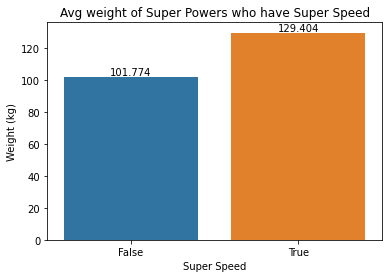

In [38]:
ax= sns.barplot(data=df, x='Super Speed', y='Weight (kg)', ci=None);
ax.set_title('Avg weight of Super Powers who have Super Speed')

ax.bar_label(ax.containers[0]);

2. What is the average height of heroes for each publisher?

In [39]:
df.groupby('Publisher')['Height (cm)'].mean()

Publisher
DC Comics            181.920290
Dark Horse Comics    176.909091
George Lucas         159.600000
Image Comics         211.000000
Marvel Comics        191.545455
Shueisha             171.500000
Star Trek            181.500000
Team Epic TV         180.750000
Unknown              178.000000
Name: Height (cm), dtype: float64

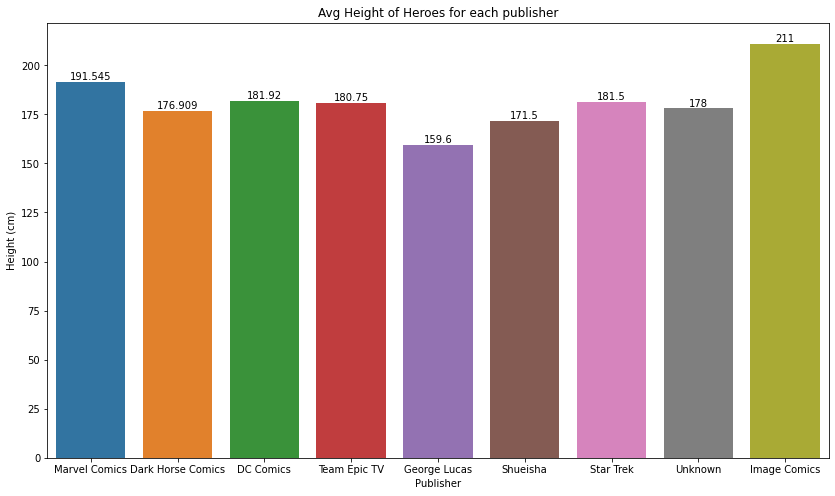

In [81]:
fig,ax= plt.subplots(figsize=(14, 8))#data=df, x='Publisher', y='Height (cm)', ci=None);
sns.barplot(x= 'Publisher', y='Height (cm)', ax=ax, data=df, ci=None).set(title='Avg Height of Heroes for each publisher')

plt.bar_label(ax.containers[0]);

# Reference: https://stackoverflow.com/questions/68320207/how-to-get-the-label-values-on-a-bar-chat-with-seaborn-on-a-categorical-data